# Iris dataset - Regressão Logística - 3 classes

## Objetivos

Este notebook ilustra o problema de classificação.

O objetivo é classificar as amostras da Íris em 3 classes.
- o alvo é o índice da classe: 0, 1 ou 2
- função de perda é Entropia Cruzada
- rede é uma camada densa linear com duas entradas e três saídas (n. de classes)

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmax_CrossEntropy_Otimizacao.png)

## Importação das bibliotecas

In [ ]:
# http://pytorch.org/
from os.path import exists
#!pip install numpy==1.15.0
!pip install -q install wheel==0.34.2 setuptools

from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
print(get_abbr_impl())
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

#https://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp37-cp37m-linux_x86_64.whl
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1.post2-{platform}-linux_x86_64.whl torchvision
import torch

ERROR: tensorflow 2.5.0 has requirement wheel~=0.35, but you'll have wheel 0.34.2 which is incompatible.
cp
     |████████████████████████████████| 89.4MB 1.3MB/s 
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 0.4.1.post2 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 0.4.1.post2 which is incompatible.
ERROR: fastai 1.0.61 has requirement torch>=1.0.0, but you'll have torch 0.4.1.post2 which is incompatible.


In [ ]:
%matplotlib inline
import os
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from IPython import display

## Dataset: Leitura, normalização e visualização dos dados

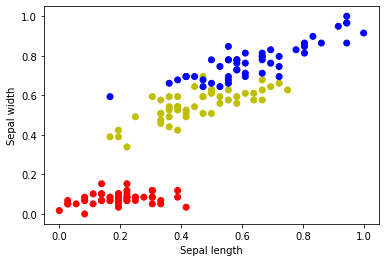

In [ ]:
iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
# normalização
Xc = X - X.min(axis=0)
Xs = Xc.max(axis=0)
Xc = Xc/Xs

Y = iris.target
colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Prepara os dados para o PyTorch

In [ ]:
X_tensor = torch.FloatTensor(Xc)  # Entrada é FloatTensor
Y_tensor = torch.LongTensor(Y)    # Classe é LongTensor

In [ ]:
Y_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## Construindo o modelo da rede

A saída da rede é composta por um neurônio para cada classe. A saída é denominada *scores* ou logitos:

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLogisticaRede_2_3.png)

In [ ]:
model = nn.Linear(2,3)  # 2 entradas e 3 saídas

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([[-0.2131,  0.1628],
                      [ 0.6523,  0.6044],
                      [ 0.3397,  0.2697]])),
             ('bias', tensor([-0.0044,  0.0994, -0.5920]))])

### Fazendo um predict

In [ ]:
out = model(Variable(X_tensor[:4,:])) # 4 amostras
out

tensor([[-0.0407,  0.2853, -0.4982],
        [-0.0289,  0.2491, -0.5171],
        [-0.0198,  0.2026, -0.5405],
        [-0.0084,  0.2050, -0.5408]], grad_fn=<ThAddmmBackward>)

In [ ]:
oo = F.softmax(out,dim=1)
oo

tensor([[0.3313, 0.4590, 0.2097],
        [0.3408, 0.4500, 0.2092],
        [0.3517, 0.4393, 0.2090],
        [0.3540, 0.4382, 0.2078]], grad_fn=<SoftmaxBackward>)

### Calculando as probabilidades com Softmax

- [Wikipedia:Softmax_function](https://en.wikipedia.org/wiki/Softmax_function)

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/softmax.png)

In [ ]:
F.softmax(out,dim=1)*100

tensor([[33.1303, 45.9026, 20.9671],
        [34.0808, 45.0030, 20.9163],
        [35.1716, 43.9333, 20.8950],
        [35.3983, 43.8173, 20.7844]], grad_fn=<MulBackward>)

### Predição da classe

In [ ]:
prob,y_pred = torch.max(F.softmax(out,dim=1),dim=1)
print(y_pred)
print(prob)

tensor([1, 1, 1, 1])
tensor([0.4590, 0.4500, 0.4393, 0.4382], grad_fn=<MaxBackward0>)


## Treinamento

### Classe para visualização dinâmica

In [ ]:
def predict(model, inputs):
    outputs = model(Variable(inputs))
    _, predicts = torch.max(outputs, 1)

    return predicts.data.numpy()

def predict_prob(model, inputs):
    outputs = model(Variable(inputs))
    outputs = F.softmax(outputs,dim=1)
    predicts, _ = torch.max(outputs, 1)

    return predicts.data.numpy()

class MyPlotter():
    def __init__(self, model, X, Y, n_epoch, filepath=None, h = .01):
        self.model = model
        self.X = X
        self.Y = Y
        self.n_epoch = n_epoch
        self.filepath = filepath
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        self.loss_hist = []
        self.val_loss_hist = []
        self.X_grid = np.c_[self.xx.ravel(), self.yy.ravel()]

        #Gráficos a serem mostrados pelo callback
        self.fig = plt.figure(figsize=(12, 4), dpi=100)
        self.ax1 = self.fig.add_subplot(1, 3, 1)
        self.ax1.set_xlim(0, nb_epoch)
        self.ax1.set_xlabel('Epoca')#,fontsize=28)
        self.ax1.set_ylabel('Perda')#,fontsize=28)
        self.ax1.set_title('Perda x Época')
        self.ax1.plot([],[],'b',linewidth = 2.0,label = "Treino")
        self.ax1.grid(True)

        self.ax2 = self.fig.add_subplot(1, 3, 2)
        self.ax2.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax2.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax2.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax2.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax2.set_title('Fronteiras de decisão')

        self.ax3 = self.fig.add_subplot(1, 3, 3)
        self.ax3.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax3.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax3.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax3.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax3.set_title('Máxima probabilidade')

    def on_train_begin(self, logs={}):
        display.display(self.fig)
        display.clear_output(wait=True)

    def on_epoch_end(self, epoch, logs={}):
        if 'loss' in logs.keys():
            self.loss_hist.append(logs['loss'])

            if epoch%250==0:
                self.ax1.plot(np.arange(epoch+1), self.loss_hist, 'b', linewidth = 2.0)

                #Z = predict(self.model, torch.from_numpy(self.X_grid).type(torch.FloatTensor))
                Zc = predict(self.model,torch.FloatTensor(self.X_grid))
                Zc = Zc.reshape(self.xx.shape)

                self.ax2.pcolormesh(self.xx, self.yy, Zc, cmap=plt.cm.Paired)
                colors = np.array(['r','y','b'])
                self.ax2.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                Zp = predict_prob(self.model,torch.FloatTensor(self.X_grid))
                Zp = Zp.reshape(self.xx.shape)

                self.ax3.pcolormesh(self.xx, self.yy, Zp, cmap=plt.cm.magma)
                colors = np.array(['r','y','b'])
                self.ax3.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                display.display(self.fig)
                display.clear_output(wait=True)

### Laço principal de treinamento da Regressão Logística por Softmax

In [ ]:
lr = 0.15

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Final loss: 0.20727571845054626


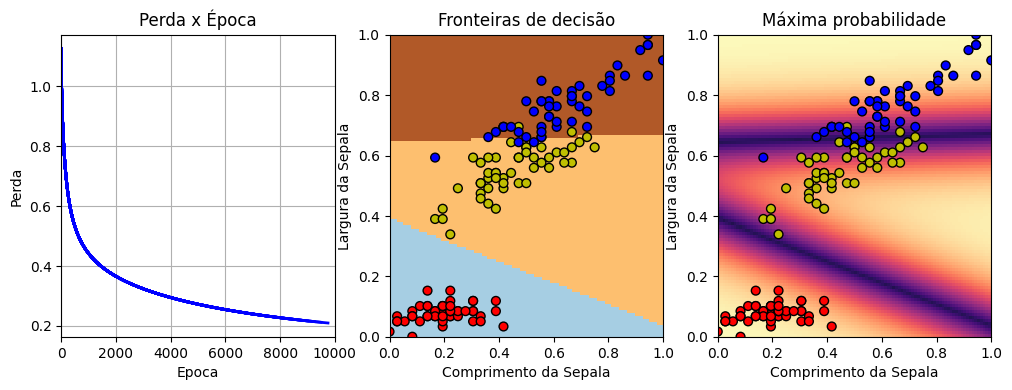

In [ ]:
nb_epoch = 10000

#Definindo o plotter
my_plot = MyPlotter(model, Xc, Y, nb_epoch)

losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    # calcula a perda
    loss = criterion(output, Variable(Y_tensor))

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data.item())

    my_plot.on_epoch_end(i, {'loss': loss.data[0].item()});
    final_loss = loss.data.item()

print('Final loss:', final_loss)

## Avaliação

### Parâmetros após treinamento

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([[ -2.8926, -14.3216],
                      [  2.0780,  -0.3384],
                      [  1.5934,  15.6969]])),
             ('bias', tensor([ 6.8646,  1.4505, -8.8120]))])

### Salvando os parâmetros treinados

In [ ]:
os.makedirs('../models',exist_ok=True)
torch.save(model.state_dict(),'../models/RegrLog_Iris.pt')

In [ ]:
! ls ../models/

RegrLog_Iris.pt


In [ ]:
nn.init.constant(model.weight,0)
model.state_dict()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  """Entry point for launching an IPython kernel.


OrderedDict([('weight', tensor([[0., 0.],
                      [0., 0.],
                      [0., 0.]])),
             ('bias', tensor([ 6.8646,  1.4505, -8.8120]))])

### Recuperando os pesos salvos

In [ ]:
param_saved = torch.load('../models/RegrLog_Iris.pt')
model.load_state_dict(param_saved)
model.state_dict()

OrderedDict([('weight', tensor([[ -2.8926, -14.3216],
                      [  2.0780,  -0.3384],
                      [  1.5934,  15.6969]])),
             ('bias', tensor([ 6.8646,  1.4505, -8.8120]))])

### Exatidão (acurácia) do classificador

Acurácia indica o número de acertos sobre o número total de amostras

In [ ]:
Y_pred = predict(model, X_tensor)
accuracy = (Y_pred == Y).mean()
print('Training Accuracy: ', accuracy)

Training Accuracy:  0.96


### Matriz de confusão

In [ ]:
import pandas as pd
pd.crosstab(Y_pred, Y)

col_0   0   1   2
row_0            
0      50   0   0
1       0  47   3
2       0   3  47

## Atividades

### Perguntas:

1. Observe que se após o treinamento, a célula for executada novamente, ela continua utilizando os parâmetros treinados até sua última execução. O que é preciso fazer para que o treinamento comece deste o início, como da primeira vez que foi executado?
2. Quantos parâmetros possui esta rede? Quantos são da camada densa e quantos são de bias?
3. Quantas entradas e quantas saídas esta rede possui?
4. Como se pode calcular a acurácia a partir da matriz de confusão?
5. O que faz a função `torch.max`? Quantos parâmetros ela retorna e quais seus significados?
    - http://pytorch.org/docs/master/torch.html?highlight=torch%20max#torch.max

### Exercícios:

1. Experimente refazer o treinamento com diferentes valores de learning rate
2. Na opção de mostrar o valor das probabilidades no gráfico do espaço de atributos,
troque a tabela de cores **magma** utilizada no `pcolormesh` que está com o parâmetro `cmap=plt.cm.magma`. Escolha a tabela de cores consultando o manual do matplotlib:
    - https://matplotlib.org/users/colormaps.html
3. Observando o gráfico de máxima probabilidade, responda:
    1. Qual é a amostra classificada corretamente, com maior probabilidade?
    R.: 0,0
    2. Qual é a amostra classificada erradamente, com maior probabilidade?
    
    3. Qual é a amostra classificada corretamente, com menor probabilidade?
    4. Qual é a amostra classificada erradamente, com menor probabilidade?



1. Sobre o gráfico de máxima probabilidade:

* 1.1. Amostra classificada corretamente, com maior probabilidade A que está mais distante da fronteira e na cor da classe correta (ex: ponto vermelho no fundo vermelho escuro).

* 1.2. Amostra classificada erradamente, com maior probabilidade Ponto com cor diferente do fundo, mas em região com cor intensa (alta confiança incorreta).

* 1.3. Amostra classificada corretamente, com menor probabilidade Ponto da classe correta, mas muito próximo da fronteira, onde o fundo tem cor mais clara (baixa confiança).

* 1.4. Amostra classificada erradamente, com menor probabilidade Ponto classificado errado, próximo da fronteira e com cor de fundo mais neutra (baixa confiança incorreta).

* 2. Quantos parâmetros possui esta rede?
      
      A camada Linear(2, 3) tem 6 pesos e bias → Total = 9 parâmetros

* 3. Quantas entradas e saídas essa rede possui?

      Entradas: 2 (sépala e pétala)
      Saídas: 3 (classes da íris)

* 4. Como se calcula a acurácia a partir da matriz de confusão?

      Soma dos valores da diagonal principal (acertos) dividido pelo total de amostras.

* 5. O que faz a função torch.max? Retorna dois valores:

      O valor máximo de uma dimensão especificada (dim)
  
      O índice desse valor (útil para saber qual classe foi predita)



## Principais aprendizados

1. Usa-se a rede Linear, com um neurônio para cada classe prevista.
2. O bloco Softmax é responsável por converter a saída da rede (scores) para probabilidades.
3. Cuidado no uso do eixo de normalização do Softmax (eixo de atributos)
4. Acurácia (exatidão) e matriz de confusão são métricas para medir o desempenho de classificadores.